# Chebychef Polynomial

Chebychef polynomial i in $[-1, 1]$ is defined by

$$
    T_n(x) = \cos(n \cos ^{-1}(x))\qquad n=0, 1, 2, \cdots
$$

we have the following recursive formula

$$
    T_{n+1}(x) = 2xT_n(x)-T_{n-1}(x)\qquad n=1, 2, \cdots
$$

With $T_0(x) = 1$ and $T_1(x)=x$


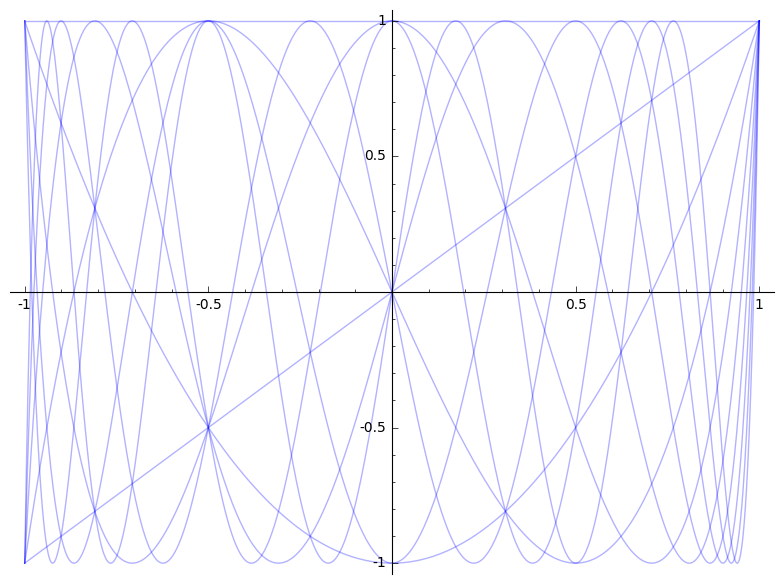

x |--> 1

In [1]:
T0 = lambda x: 1
T1 = x

p = plot(T0, (x, -1, 1), alpha=.3)
p += plot(T1, (x, -1, 1), alpha=.3)

Tn=T1; Tn_1 = 1
for i in range(2, 10):
    T = 2*x*Tn-Tn_1
    p += plot(T, (x, -1, 1), alpha=0.3)
    Tn, Tn_1 = T, Tn
show(p)

T0(x)=1
show(T0)

In [2]:
Polys = {
    0: T0,
    1: T1
}

def get_tn(n):
    if Polys.get(n, None) is None:
        Polys[n] = 2*x*get_tn(n-1) - get_tn(n-2)
    return Polys[n].expand()
show(get_tn(5))

x |--> 16*x^5 - 20*x^3 + 5*x

In [18]:
@interact
def chebychef_poly_of_order_n(
    n=slider(vmin=0, vmax=20, step_size=1),
    ):
    interp_x = [N(cos((2*k-1)*pi / (2*n))) for k in range(1, n+1)]
    interp_y = [0 for i in interp_x]
    p = plot(get_tn(n), color='black', thickness=2)
    p += scatter_plot(zip(interp_x, interp_y))
    p += text("$n={}$".format(n), (.8, .8), fontsize='large', background_color='white')
    p.set_axes_range(-1, 1, -1, 1)
    show(p)

SW50ZXJhY3RpdmUgZnVuY3Rpb24gPGZ1bmN0aW9uIGNoZWJ5Y2hlZl9wb2x5X29mX29yZGVyX24gYXQgMHg3ZjFjY2UzNGRkNTA+IHdpdGggMSB3aWRnZXQKICBuOiBUcmFuc2Zvcm1JbnRTbGnigKY=


In [4]:
def lagrange_interp(Xs, Ys):
    n = len(Xs)
    L = 0
    for i in range(n):
        Lk = Ys[i]
        for j in range(n):
            if i==j: continue
            
            Lk *= (x-Xs[j])/(Xs[i]-Xs[j])
        L += Lk
    return L.expand()

To find the interpolating polynomial of degree $n$ with least $\infty$ norm, we choose interpolating points as

$$
    \frac{b-a}{2}\cos(\frac{(k+1/2)\pi}{n+1})+\frac{a+b}{2}\qquad k=0, 1, \cdots, n
$$

In [5]:
n = 7
interp_x = [N(cos((k+.5)*pi / (n+1))) for k in range(0, n+1)]
interp_y = [sin(5*z) for z in interp_x]

interp_poly = lagrange_interp(interp_x, interp_y)
show(interp_poly)

-7.53877674180143*x^7 + (7.10542735760100e-15)*x^6 + 21.5605864522835*x^5 - (5.32907051820075e-15)*x^4 - 19.9748600955607*x^3 + (8.88178419700125e-16)*x^2 + 4.97338973077837*x - 4.44089209850063e-16

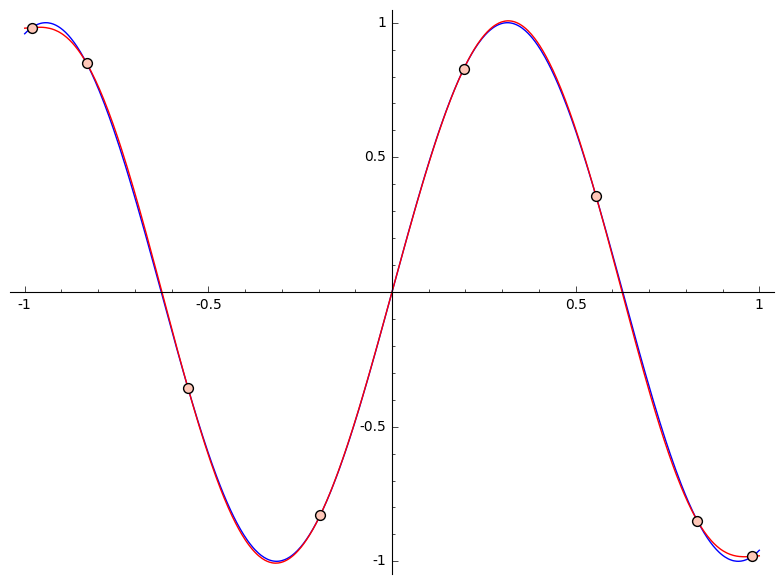

In [6]:
p = plot(sin(5*x), (x, -1, 1))
p += scatter_plot(zip(interp_x, interp_y))
p += plot(interp_poly, color='red')
show(p)

In [7]:
# book problem
poly = lagrange_interp([0, 1, 3], [1, 3, 55])
show(poly)


8*x^2 - 6*x + 1

In [17]:
text??